In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [9]:
stock = pd.read_csv('D:\Programming\Codecluse\Microsoft_Stock.csv')
stock.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [10]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [11]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [12]:
print(f'Dataframe contains stock prices between {stock.Date.min()} {stock.Date.max()}') 
print(f'Total days = {(stock.Date.max()  - stock.Date.min()).days} days')

Dataframe contains stock prices between 2015-04-01 16:00:00 2021-03-31 16:00:00
Total days = 2191 days


In [13]:
stock.describe()

,Date,Open,High,Low,Close,Volume
count,1511,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,2018-03-31 17:23:44.751820032,107.385976,108.437472,106.294533,107.422091,3.019863e+07
min,2015-04-01 16:00:00,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,2016-09-29 04:00:00,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,2018-04-02 16:00:00,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,2019-10-01 04:00:00,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,2021-03-31 16:00:00,245.030000,246.130000,242.920000,244.990000,1.352271e+08
std,NaN,56.691333,57.382276,55.977155,56.702299,1.425266e+07


<AxesSubplot: >

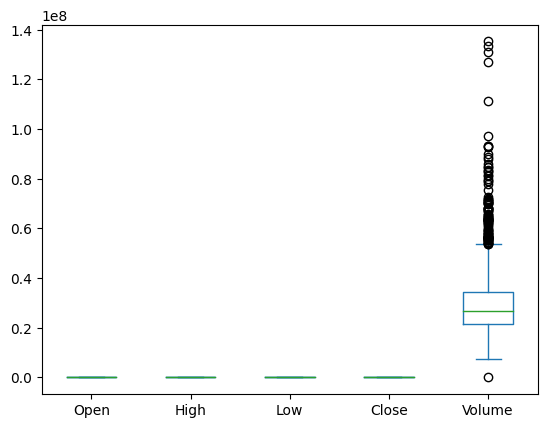

In [14]:
stock[['Open','High','Low','Close','Volume']].plot(kind='box')

In [15]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices ',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

stock_data = [{'x':stock['Date'], 'y':stock['Close']}]
plot = go.Figure(data=stock_data, layout=layout)

In [16]:
#plot(plot) #plotting offline
iplot(plot)

In [17]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [18]:
#Split the data into train and test sets
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [19]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [22]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
stock_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_data, layout=layout)

In [23]:
iplot(plot2)

In [24]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9026818739669962	0.8946245408076214
MSE       318.9349640372809	321.546116078044

